In [2]:
# Dataset Description

# Age : displays the age of the individual.

# Sex : displays the gender of the individual using the following format : 1 = male 0 = female.

# Chest-pain type : displays the type of chest-pain experienced by the individual using the following format : 1 = typical angina 2 = atypical angina 3 = non - anginal pain 4 = asymptotic


# Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)


# Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)


# Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)


# Resting ECG : 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy


# Max heart rate achieved : displays the max heart rate achieved by an individual.


# Exercise induced angina : 1 = yes 0 = no


# Oldpeak: oldpeak = ST [Numeric value measured in depression]


# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]. 1 = upsloping 2 = flat 3 = downsloping

# Target: output class [1: heart attack, 0: Normal].


In [3]:
#importing necassary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import warnings
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Data used for my analysis
heart_data = pd.read_csv(r"C:\Users\allif\Downloads\heart_attack.csv")
heart_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
print('The shape of heart data is:',heart_data.shape)

The shape of heart data is: (1190, 12)


In [6]:
# Observation: We have 1319 rows and 9 columns in our dataset

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
#To find any missing values
heart_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Observation: No missing values

In [9]:
#To check for duplicates
heart_data.duplicated().sum()

272

In [10]:
#To count each category in the datasets  #1 = male 0 = female
heart_data['sex'].value_counts()

sex
1    909
0    281
Name: count, dtype: int64

In [11]:
# Count of patients with heart attack (target = 1)
patients_with_heart_attack = heart_data[heart_data['target'] == 1]['target'].count()

# Count of patients without heart disease (target = 0)
patients_without_heart_attack = heart_data[heart_data['target'] == 0]['target'].count()

# Minimum age of patients
min_age = heart_data['age'].min()

# Maximum age of patients
max_age = heart_data['age'].max()

# Count of patients with hypertension (assuming resting bp s > 140 indicates hypertension)
hypertensive_patients = heart_data[heart_data['resting bp s'] > 140]['resting bp s'].count()

# Count of patients with high fasting blood sugar (fasting blood sugar > 120)
high_fasting_blood_sugar_patients = heart_data[heart_data['fasting blood sugar'] > 120]['fasting blood sugar'].count()

# Count of patients with high cholesterol (cholesterol > 200)
high_cholesterol_patients = heart_data[heart_data['cholesterol'] > 200]['cholesterol'].count()

# Count of patients with chest pain
chest_pain_counts = heart_data['chest pain type'].value_counts()

# Count of patients with resting exg
resting_ecg_counts = heart_data['resting ecg'].value_counts()


# Count of patients with exercise agnia
exercise_angina_counts = heart_data['exercise angina'].value_counts()
print("Counts of Exercise-Induced Angina:\n", exercise_angina_counts)

# Count of patients with st_slope
st_slope_counts = heart_data['ST slope'].value_counts()


print("Patients with Heart Attack:", patients_with_heart_attack)
print("Patients without Heart Attack:", patients_without_heart_attack)
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("Hypertensive Patients:", hypertensive_patients)
print("Patients with High Fasting Blood Sugar:", high_fasting_blood_sugar_patients)
print("Patients with High Cholesterol:", high_cholesterol_patients)
print("Counts of Chest Pain Types:\n", chest_pain_counts)
print("Counts of Exercise-Induced Angina:\n", exercise_angina_counts)
print("Counts of Resting ECG Types:\n", resting_ecg_counts)
print("Counts of ST Slopes:\n", st_slope_counts)

Counts of Exercise-Induced Angina:
 exercise angina
0    729
1    461
Name: count, dtype: int64
Patients with Heart Attack: 629
Patients without Heart Attack: 561
Minimum Age: 28
Maximum Age: 77
Hypertensive Patients: 279
Patients with High Fasting Blood Sugar: 0
Patients with High Cholesterol: 828
Counts of Chest Pain Types:
 chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
Counts of Exercise-Induced Angina:
 exercise angina
0    729
1    461
Name: count, dtype: int64
Counts of Resting ECG Types:
 resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
Counts of ST Slopes:
 ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64


In [12]:
#To get the statistics
round(heart_data.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.72,9.36,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.76,0.42,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.23,0.94,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.15,18.37,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.36,101.42,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.21,0.41,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.70,0.87,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.73,25.52,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.39,0.49,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.92,1.09,-2.6,0.0,0.6,1.60,6.2


In [13]:
#To check for multicolinearity
correlation = heart_data.select_dtypes('number').corr()
correlation


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


<function matplotlib.pyplot.show(close=None, block=None)>

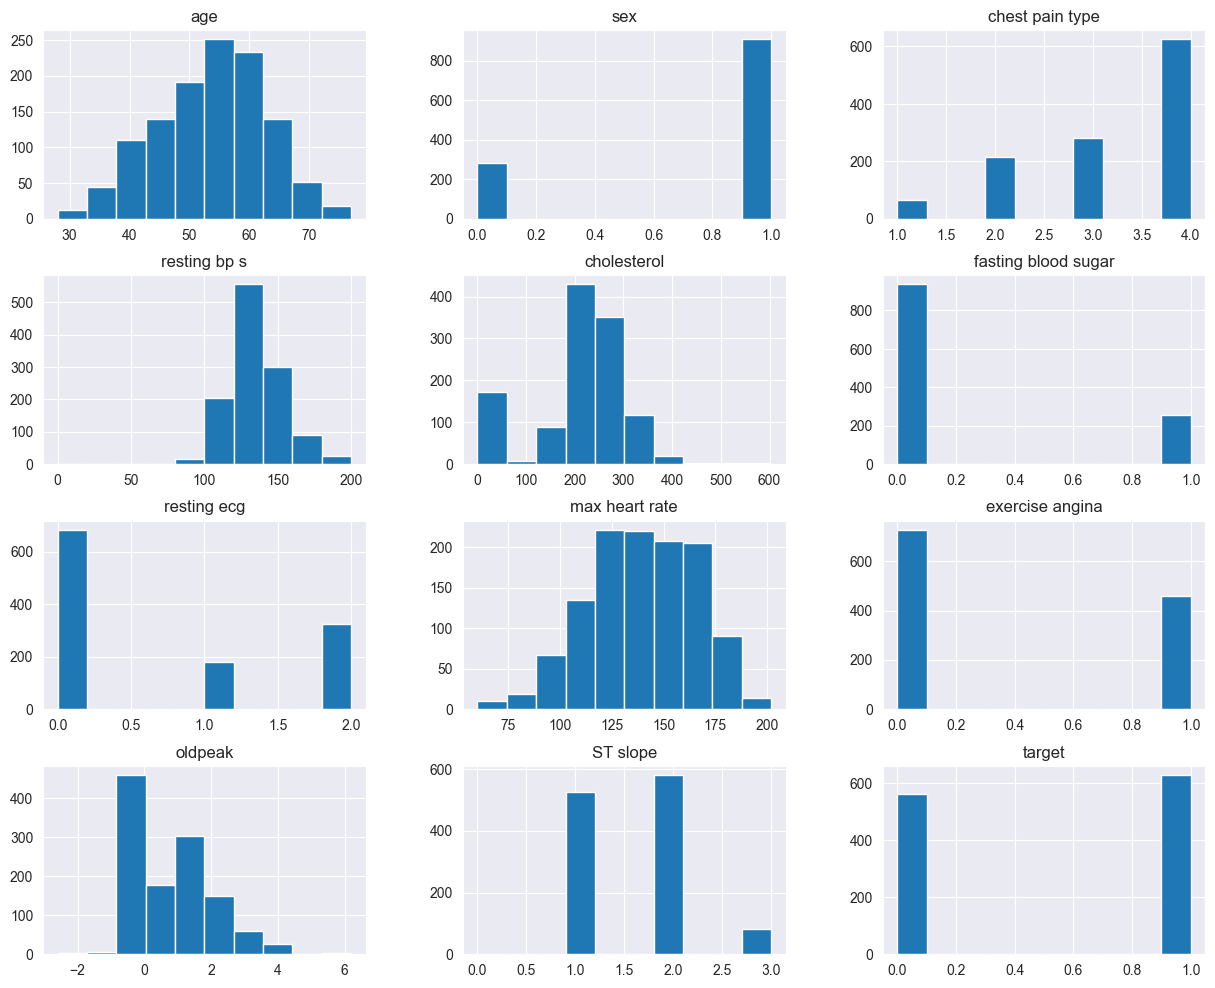

In [14]:
#To check for continuous variable
heart_data.hist(figsize=(15,12))
plt.show

In [15]:
round(heart_data['fasting blood sugar'].describe(),1)

count    1190.0
mean        0.2
std         0.4
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: fasting blood sugar, dtype: float64

In [16]:
(heart_data['fasting blood sugar'] > 0.2).value_counts()

fasting blood sugar
False    936
True     254
Name: count, dtype: int64

In [17]:
round(heart_data['resting ecg'].describe(),1)

count    1190.0
mean        0.7
std         0.9
min         0.0
25%         0.0
50%         0.0
75%         2.0
max         2.0
Name: resting ecg, dtype: float64

In [18]:
(heart_data['resting ecg'] > 0.7).value_counts()

resting ecg
False    684
True     506
Name: count, dtype: int64

In [19]:
round(heart_data['age'].describe(),1)

count    1190.0
mean       53.7
std         9.4
min        28.0
25%        47.0
50%        54.0
75%        60.0
max        77.0
Name: age, dtype: float64

In [20]:
(heart_data['age'] > 53.7).value_counts()

age
True     653
False    537
Name: count, dtype: int64

TO CHECK FOR OUTLIERS

In [21]:
from scipy.stats import skew
# To filter out non-numeric columns
numeric_cols = heart_data.select_dtypes(include=[float, int]).columns

# To calculate skewness for each numeric variable
skewness = heart_data[numeric_cols].apply(lambda x: skew(x.dropna()))
print(skewness)

age                   -0.191869
sex                   -1.242581
chest pain type       -0.884526
resting bp s           0.293092
cholesterol           -0.780660
fasting blood sugar    1.398716
resting ecg            0.623841
max heart rate        -0.232804
exercise angina        0.462296
oldpeak                1.092626
ST slope               0.404578
target                -0.114473
dtype: float64


In [22]:
from scipy.stats import kurtosis

# To calculate kurtosis for each numeric variable
kurtosis_values = heart_data[numeric_cols].apply(lambda x: kurtosis(x.dropna()))
print(kurtosis_values)

age                   -0.415085
sex                   -0.455994
chest pain type       -0.409867
resting bp s           2.741287
cholesterol            0.815767
fasting blood sugar   -0.043593
resting ecg           -1.390560
max heart rate        -0.463429
exercise angina       -1.786282
oldpeak                1.397630
ST slope              -0.644934
target                -1.986896
dtype: float64


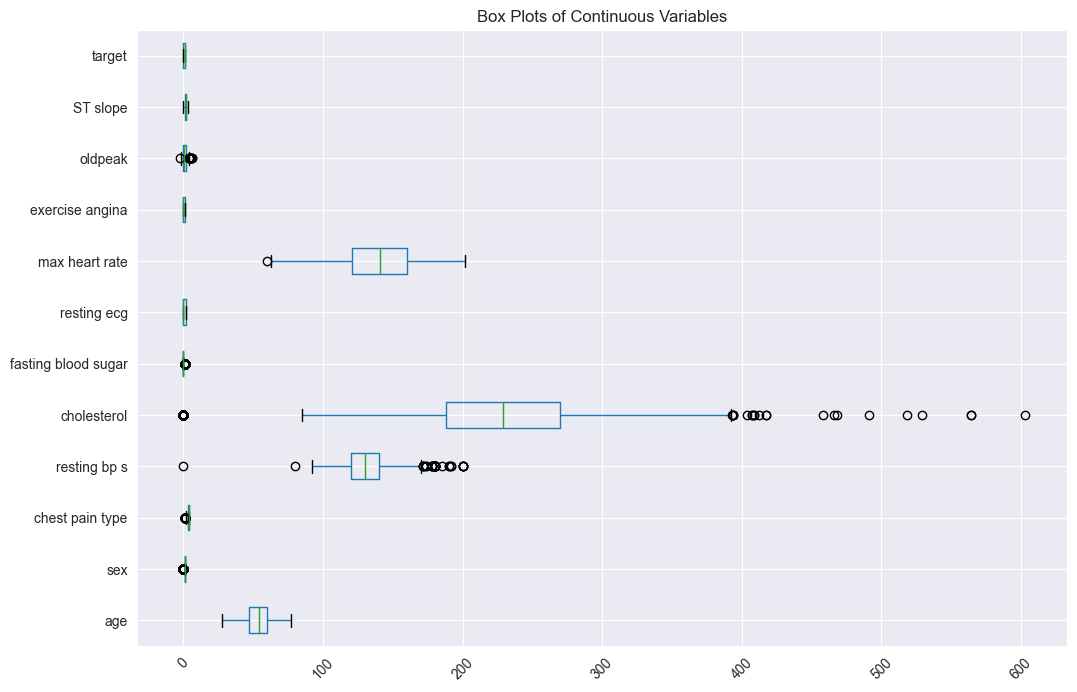

In [23]:
import matplotlib.pyplot as plt

# To create box plots for continuous variables
plt.figure(figsize=(12, 8))
heart_data[numeric_cols].boxplot(vert=False)
plt.title('Box Plots of Continuous Variables')
plt.xticks(rotation=45)
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

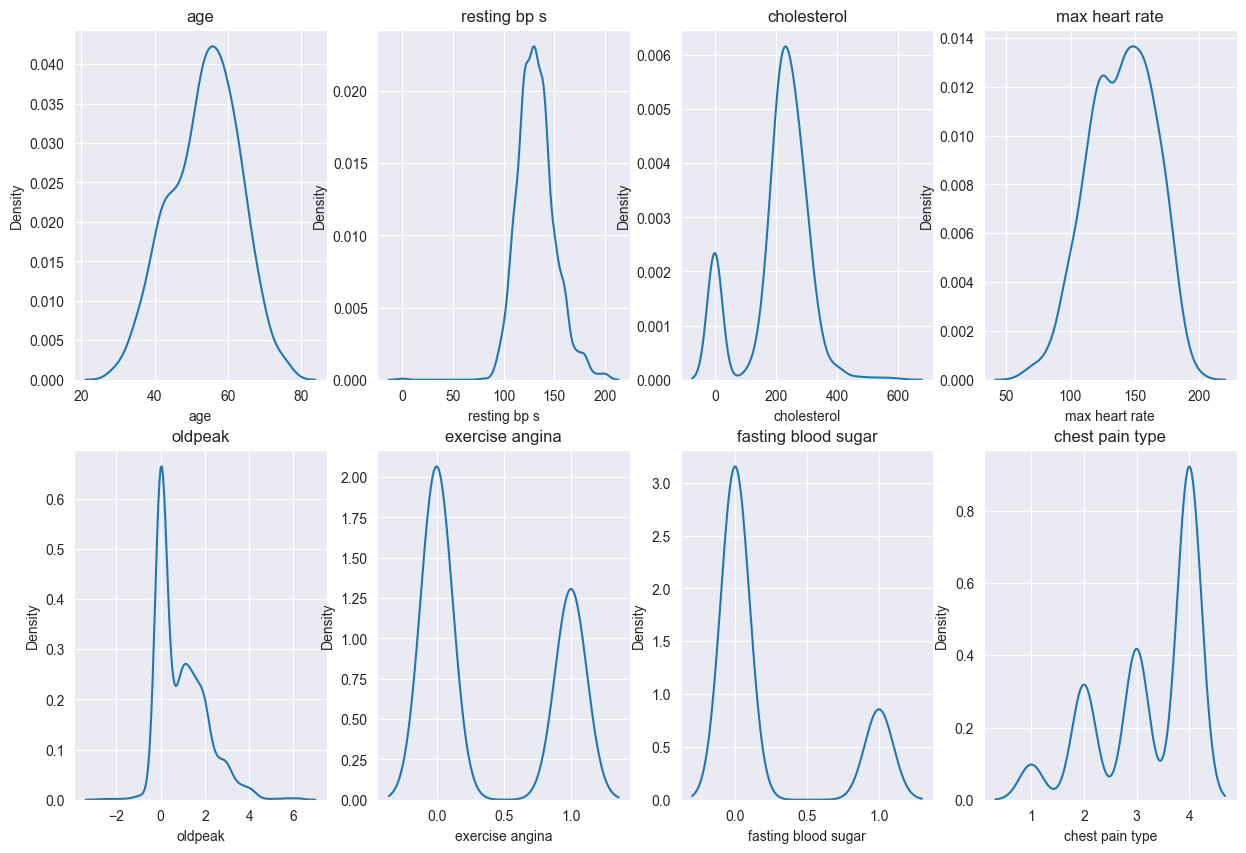

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# To select continuous variables
continuous_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'exercise angina', 'fasting blood sugar', 'chest pain type', 'resting ecg', 'ST slope', 'sex']

# To calculate the number of rows and columns needed for the grid
num_rows = len(continuous_cols) // 4
num_cols = 4

# To create subplots in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# To flatten the axes array for easy iteration
axes = axes.flatten()

# To plot kernel density plots for each continuous variable
for i, col in enumerate(continuous_cols):
    sns.kdeplot(data=heart_data, x=col, ax=axes[i])
    axes[i].set_title(col)

# To remove any empty subplots
for i in range(len(continuous_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


<Axes: >

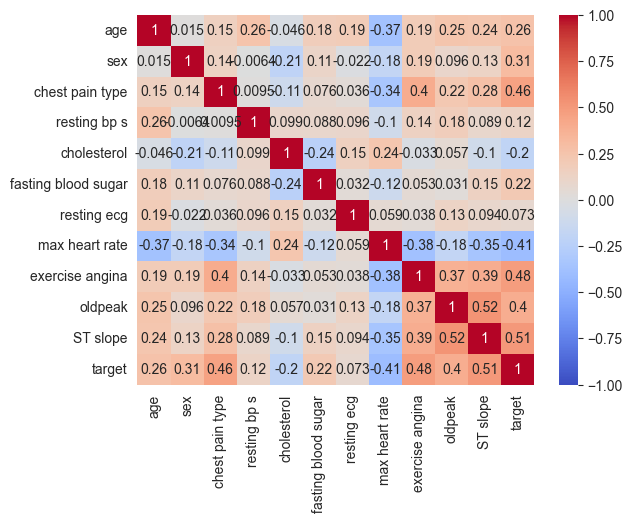

In [25]:
#To visualise the correlation
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linecolor='White')

In [26]:
# Calculate correlation matrix
correlation_matrix = heart_data.corr()

# Filter variables with correlation above 0.2
high_corr_vars = correlation_matrix[abs(correlation_matrix['target']) > 0.2]['target']

# Display variables with high correlation
print(high_corr_vars)

age                    0.262029
sex                    0.311267
chest pain type        0.460127
fasting blood sugar    0.216695
max heart rate        -0.413278
exercise angina        0.481467
oldpeak                0.398385
ST slope               0.505608
target                 1.000000
Name: target, dtype: float64


Normalisation of Data

In [27]:
from sklearn.preprocessing import Normalizer

# To separate dependent and independent variables
X = heart_data.drop(columns=['target'])  # Independent variables
y = heart_data['target']  # Dependent variable

# To initialize the Normalizer with L2 normalization
normalizer = Normalizer(norm='l2')

# Apply L2 normalization to the independent variables
normalized_X = normalizer.transform(X)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_X, columns=X.columns)

# Print the normalized data
print(normalized_df)


           age       sex  chest pain type  resting bp s  cholesterol  \
0     0.109145  0.002729         0.005457      0.382008     0.788573   
1     0.168315  0.000000         0.010305      0.549601     0.618301   
2     0.112604  0.003043         0.006087      0.395634     0.861265   
3     0.170959  0.000000         0.014247      0.491507     0.762192   
4     0.192936  0.003573         0.010719      0.535933     0.696713   
...        ...       ...              ...           ...          ...   
1185  0.141420  0.003143         0.003143      0.345692     0.829662   
1186  0.236712  0.003481         0.013924      0.501272     0.671844   
1187  0.253500  0.004447         0.017789      0.578158     0.582605   
1188  0.174964  0.000000         0.006139      0.399042     0.724414   
1189  0.133475  0.003512         0.010537      0.484724     0.614686   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                0.000000     0.000000        0.469324      

Finding the importance features using random forest classifier

                Feature  Importance  Percentage
10             ST slope    0.166910   16.690996
2       chest pain type    0.141632   14.163203
7        max heart rate    0.119101   11.910070
4           cholesterol    0.113511   11.351129
9               oldpeak    0.111501   11.150069
0                   age    0.088964    8.896387
8       exercise angina    0.088284    8.828394
3          resting bp s    0.081246    8.124579
1                   sex    0.041213    4.121281
6           resting ecg    0.026235    2.623542
5   fasting blood sugar    0.021404    2.140351


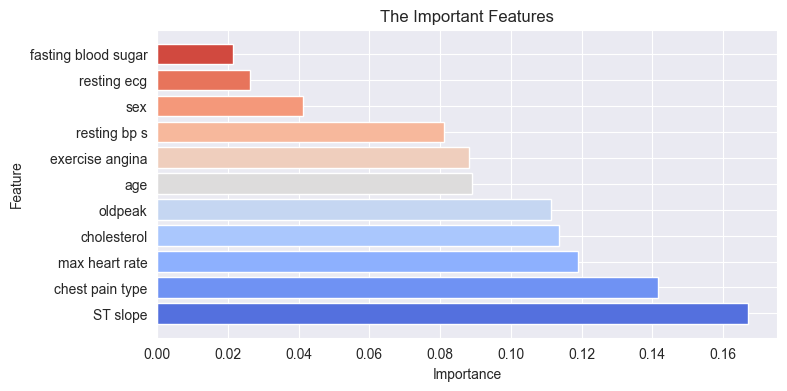

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the features (X) and the target variable (y)
X = heart_data.drop(['target',], axis=1)
y = heart_data['target']

# Initialise the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Calculate total importance
total_importance = importance_df['Importance'].sum()

# Calculate percentage importance for each feature
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100

# Print the updated DataFrame with percentage importance
print(importance_df)

# Set the figure size
plt.figure(figsize=(8, 4))

# Define a color palette for the bars
colors = sns.color_palette('coolwarm', len(importance_df))

# To plot the feature importance as horizontal bars with different colors
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('The Important Features')

# Display the plot
plt.show()


Distribution of binary and demographic variables

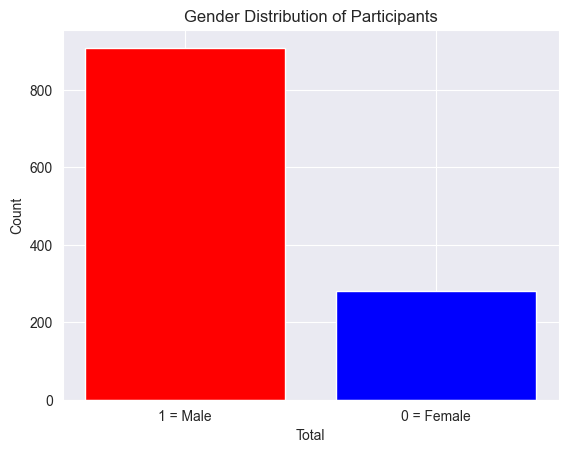

In [29]:
#Gender Distribution of Participants
sex_labels = ['1 = Male', '0 = Female']  #1 = male 0 = female
sex_counts = [909, 281]

# Create a bar plot
plt.bar(sex_labels, sex_counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Total')
plt.ylabel('Count')
plt.title('Gender Distribution of Participants')

# Show the plot
plt.show()

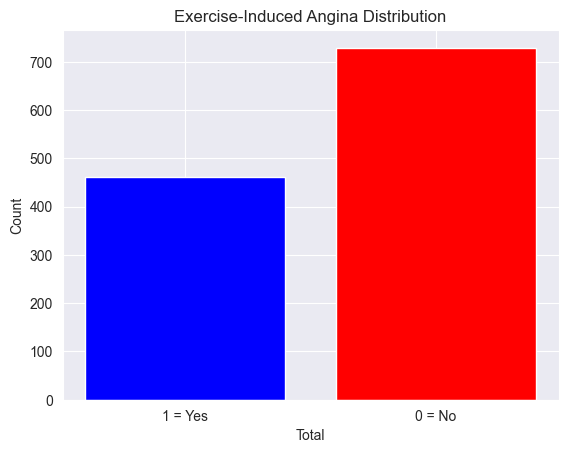

In [30]:
# Sample data
exercise_labels = ['1 = Yes', '0 = No']
exercise_counts = [461, 729]

# Create a bar plot
bars = plt.bar(exercise_labels, exercise_counts, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Total')
plt.ylabel('Count')
plt.title('Exercise-Induced Angina Distribution')

# Show the plot
plt.show()


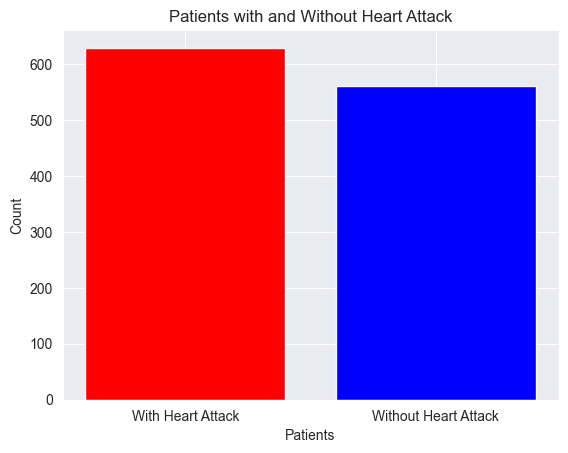

In [31]:
heart_attack_labels = ['With Heart Attack', 'Without Heart Attack']
heart_attack_counts = [629, 561]

# Create a bar plot
bars = plt.bar(heart_attack_labels, heart_attack_counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Patients')
plt.ylabel('Count')
plt.title('Patients with and Without Heart Attack')

# Show the plot
plt.show()


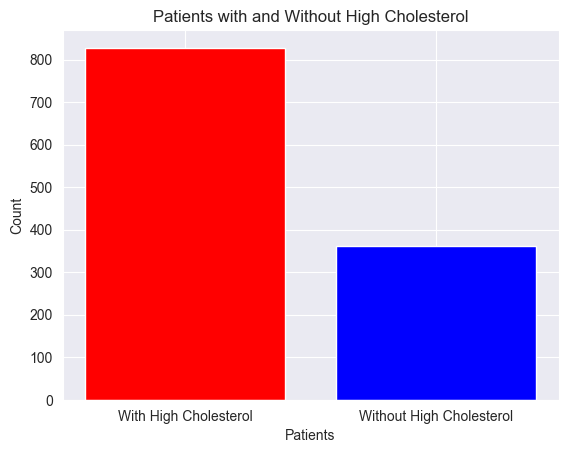

In [32]:
# Sample data
cholesterol_labels = ['With High Cholesterol', 'Without High Cholesterol']
cholesterol_counts = [828, 362]

# Create a bar plot
bars = plt.bar(cholesterol_labels, cholesterol_counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Patients')
plt.ylabel('Count')
plt.title('Patients with and Without High Cholesterol')

# Show the plot
plt.show()

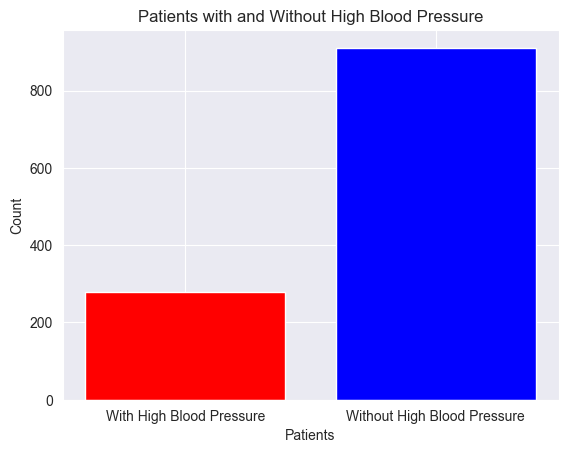

In [33]:
# Sample data
hypertension_labels = ['With High Blood Pressure', 'Without High Blood Pressure']
hypertension_counts = [279, 911]

# Create a bar plot
bars = plt.bar(hypertension_labels, hypertension_counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Patients')
plt.ylabel('Count')
plt.title('Patients with and Without High Blood Pressure')

# Show the plot
plt.show()


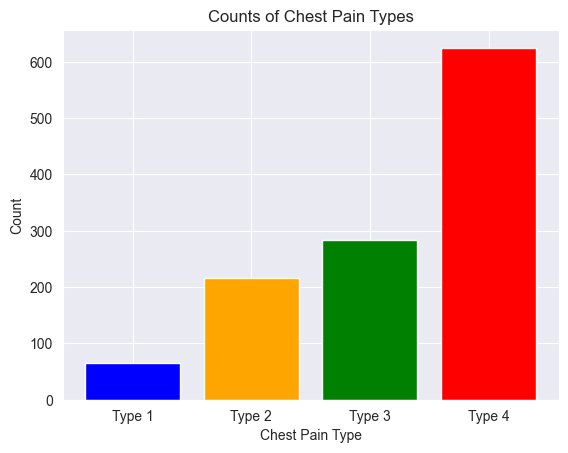

In [34]:
# Sample data
chest_pain_types = ['Type 1', 'Type 2', 'Type 3', 'Type 4']
chest_pain_counts = [66, 216, 283, 625]

# Create a bar plot
bars = plt.bar(chest_pain_types, chest_pain_counts, color=['blue', 'orange', 'green', 'red'])

# Add labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Counts of Chest Pain Types')

# Show the plot
plt.show()


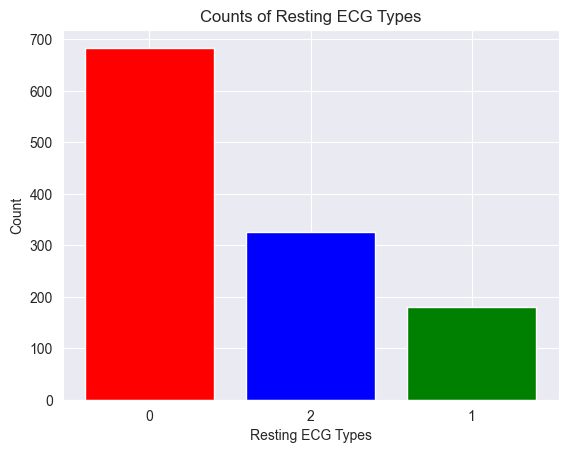

In [35]:

ecg_labels = ['0', '2', '1']
ecg_counts = [684, 325, 181]

# Create a bar plot
plt.bar(ecg_labels, ecg_counts, color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('Resting ECG Types')
plt.ylabel('Count')
plt.title('Counts of Resting ECG Types')

# Show the plot
plt.show()

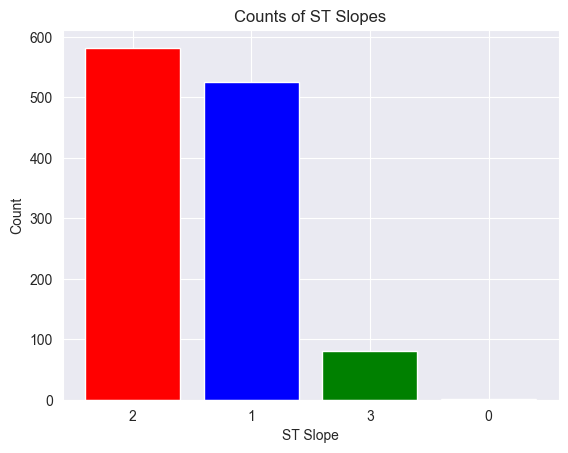

In [36]:
# Data
st_slope_labels = ['2', '1', '3', '0']
st_slope_counts = [582, 526, 81, 1]

# Create a bar plot
plt.bar(st_slope_labels, st_slope_counts, color=['red', 'blue', 'green', 'purple'])

# Add labels and title
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.title('Counts of ST Slopes')

# Show the plot
plt.show()

Scaling The Features

In [37]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Drop the 'fasting blood sugar' column
heart_data_dropped = heart_data.drop(['fasting blood sugar'], axis=1)

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Columns to scale
to_scale = heart_data[["age", "sex", "chest pain type", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "exercise angina", "oldpeak", "ST slope"]]

# Fit the scaler and transform the selected columns
scaled_data = scaler.fit_transform(to_scale)

# Create a DataFrame from the scaled data with column names
df_scaled = pd.DataFrame(scaled_data, columns=to_scale.columns)

# Append the target column to the scaled dataframe
df_scaled["target"] = heart_data["target"]

# Save the scaler using joblib
joblib.dump(scaler, "heart_attack_scaler.joblib")

# Function to scale data using the loaded scaler
def myScaler(data):
    global scaler
    data_scaled = scaler.transform(data[to_scale.columns])
    data_scaled_df = pd.DataFrame(data_scaled, columns=to_scale.columns, index=data.index)
    return data_scaled_df

# Function to inverse scale data using the loaded scaler
def myInverseScale(data):
    global scaler
    data_inverse_scaled = scaler.inverse_transform(data)
    data_inverse_scaled_df = pd.DataFrame(data_inverse_scaled, columns=data.columns, index=data.index)
    return data_inverse_scaled_df

# Load the scaler using joblib
loaded_scaler = joblib.load("heart_attack_scaler.joblib")

In [38]:
df_scaled.head()

,age,sex,chest pain type,resting bp s,cholesterol,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.788732,0.0,0.295455,0.333333,0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.666667,1
2,0.183673,1.0,0.333333,0.65,0.469320,0.5,0.267606,0.0,0.295455,0.333333,0
3,0.408163,0.0,1.000000,0.69,0.354892,0.0,0.338028,1.0,0.465909,0.666667,1
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.436620,0.0,0.295455,0.333333,0


Deployment of Model

Best Model Accuracy: 0.927170868347339
Best Precision: 0.925531914893617
Best Recall: 0.9354838709677419
Best F1-score: 0.9304812834224598
Best Hyperparameters:
max_depth: None
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 200


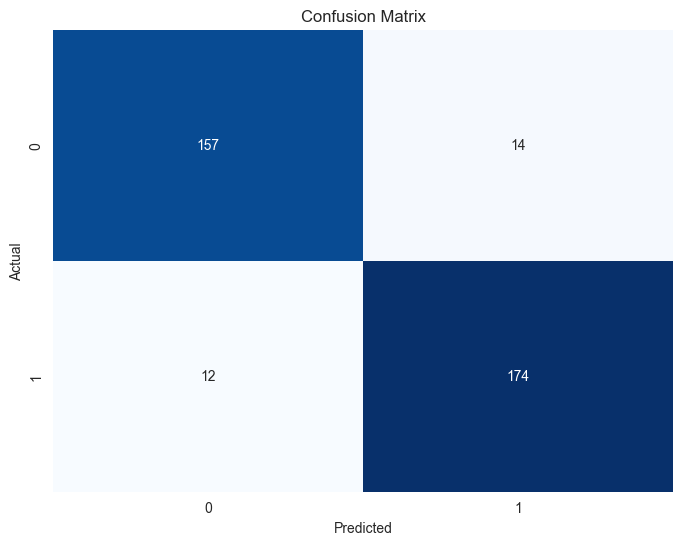

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

X = heart_data.drop(['target', 'fasting blood sugar'], axis=1)
y = heart_data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters and their corresponding values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its corresponding hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best evaluation metrics
print(f'Best Model Accuracy: {accuracy}')
print(f'Best Precision: {precision}')
print(f'Best Recall: {recall}')
print(f'Best F1-score: {f1}')

# Save the best model using joblib
joblib.dump(best_model, "heart_attack_model.joblib")

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f'{param}: {value}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = heart_data.drop(['target', 'fasting blood sugar'], axis=1)
y = heart_data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Initialize the SVM classifier
svm = SVC()

# Define the hyperparameters and their corresponding values to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its corresponding hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best evaluation metrics
print(f'Best Accuracy: {accuracy}')
print(f'Best Precision: {precision}')
print(f'Best Recall: {recall}')
print(f'Best F1-score: {f1}')

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f'{param}: {value}')

# Save the best model using joblib
joblib.dump(best_model, "best_svm_model.joblib")

Best Accuracy: 0.8543417366946778
Best Precision: 0.8602150537634409
Best Recall: 0.8602150537634409
Best F1-score: 0.8602150537634409
Best Hyperparameters:
C: 10
gamma: scale
kernel: linear


['best_svm_model.joblib']

Accuracy: 0.8543417366946778
Precision: 0.8806818181818182
Recall: 0.8333333333333334
F1-score: 0.856353591160221


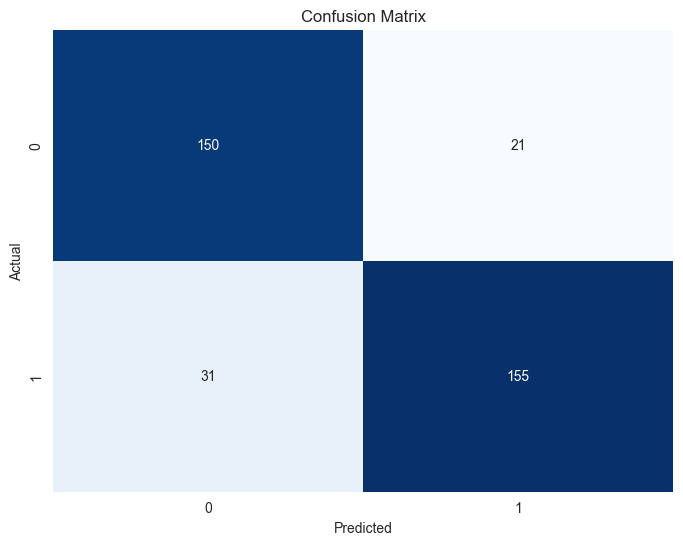

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into train and test sets
X = heart_data.drop(['target', 'fasting blood sugar'], axis=1)
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier()

# Fit the model to the training data
adaboost.fit(X_train, y_train)

# Predict on the test data
y_pred = adaboost.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Save the trained AdaBoost model using joblib
joblib.dump(adaboost, "trained_adaboost_model.joblib")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

12/12 [==============================] - 0s 2ms/step
Accuracy: 0.8431372549019608
Precision: 0.8457446808510638
Recall: 0.8548387096774194
F1-score: 0.8502673796791442


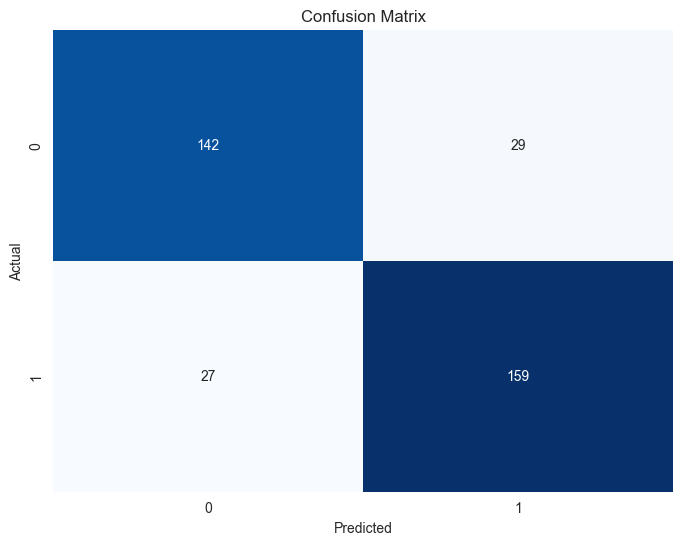

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from itertools import product
import joblib

# Prepare the data
X = heart_data.drop(['target', 'fasting blood sugar'], axis=1).values
y = heart_data['target'].values
y = to_categorical(y)  # Convert labels to one-hot encoded vectors

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Reshape the input data to fit the LSTM model (input shape: [samples, time steps, features])
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the hyperparameters to tune
units_list = [32, 64, 128]
dropout_list = [0.1, 0.2, 0.3]

best_accuracy = 0.0
best_model = None

# Perform hyperparameter tuning
for units, dropout_rate in product(units_list, dropout_list):
    model = Sequential()
    model.add(LSTM(units, input_shape=(1, X_train.shape[2]), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=120, batch_size=40, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_classes)
precision = precision_score(y_test_labels, y_pred_classes)
recall = recall_score(y_test_labels, y_pred_classes)
f1 = f1_score(y_test_labels, y_pred_classes)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Save the trained LSTM model using joblib
joblib.dump(best_model, "trained_lstm_model.joblib")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Evaluation Metrics:
Accuracy: 0.8879551820728291
Precision: 0.9345238095238095
Recall: 0.8440860215053764
F1-score: 0.8870056497175142


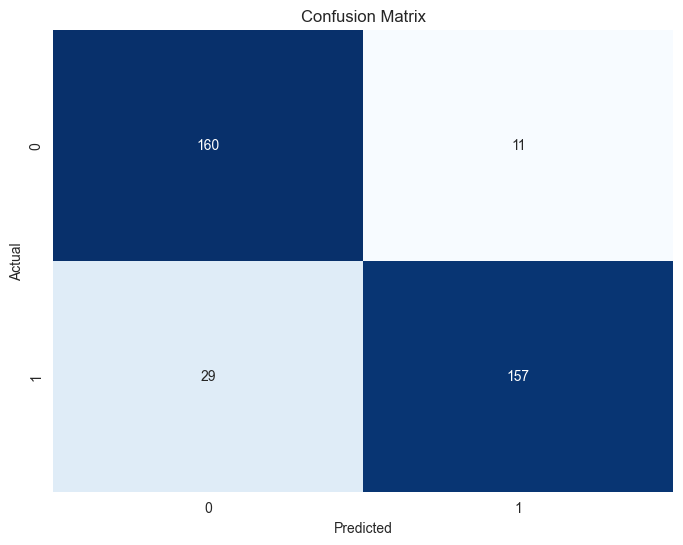

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Split the data into train and test sets
X = heart_data.drop(['target', 'fasting blood sugar'], axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model on the test data
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)
print()
print("Evaluation Metrics:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Save the trained Decision Tree model using joblib
joblib.dump(best_dt, "trained_decision_tree_model.joblib")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 354, number of negative: 312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 666, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.531532 -> initscore=0.126294
[LightGBM] [Info] Start training from score 0.126294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

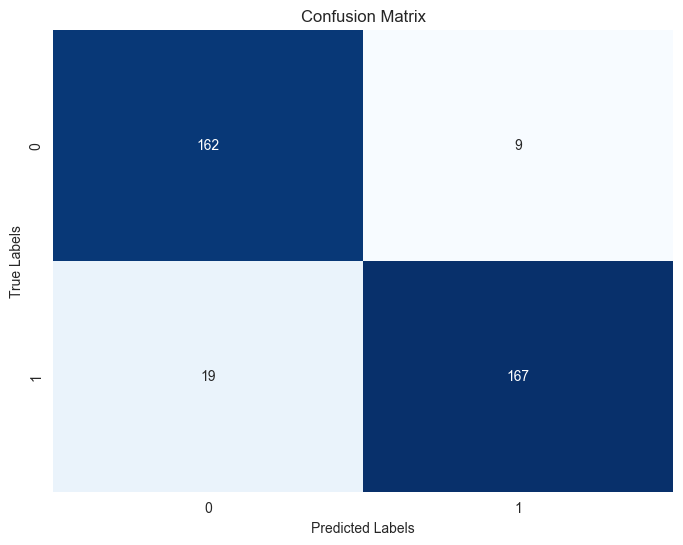

In [44]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

# Load the preprocessed heart attack data (assuming you have tabular data)
heart_data = pd.read_csv(r"C:\Users\allif\Downloads\heart_attack.csv")

# Split the data into train and test sets
X = heart_data.drop(['target', 'fasting blood sugar'], axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting iterations
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum tree depth for base learners
}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model on the test data
best_params = grid_search.best_params_
best_lgb = grid_search.best_estimator_
y_pred = best_lgb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(best_params)
print()
print("Evaluation Metrics:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Save the best LightGBM classifier to a file using joblib
joblib.dump(best_lgb, "trained_lgb_model.joblib")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()